#Brownsche Bewegung

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.stats import norm

In [2]:
data=np.genfromtxt('data/brown.dat')  #Hier der Pfad zu Euren Daten eintragen

In [3]:
print(data[0:3])
#1. Spalte: Bildnummer
#2. Spalte: Zeit
#3. Spalte: x-Pos.
#4. Spalte: y-Pos.

[[ 1.     2.    48.646 60.636]
 [ 2.     3.    48.921 62.104]
 [ 3.     4.    48.096 62.104]]


In [4]:
t=data[:,1:2] #Zeit
x=data[:,2:3] #x
y=data[:,3:4] #y

Text(0.5, 1.0, 'Brownian Motion')

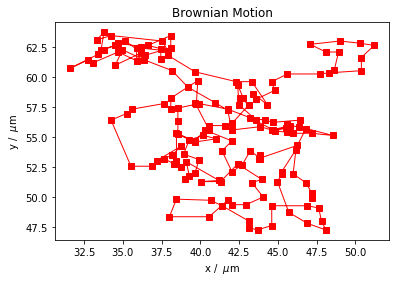

In [5]:
#Partikelbewegung zeichnen und Diagramm speichern
plt.plot(x, y, marker='s', color='red', linewidth=1)
plt.xlabel('x / '+' $\mu$'+'m')
plt.ylabel('y / '+' $\mu$'+'m')
plt.title('Brownian Motion')
#plt.savefig('figures/brown1.pdf', format='PDF')

In [6]:
#Berechnung der Differenzen dt, dx, dy
dt=np.array([])
dx=np.array([])
dy=np.array([])

for i in range(len(t)-1): 
    dt=np.append( dt,t[i+1]-t[i])
    dx=np.append( dx,x[i+1]-x[i])
    dy=np.append( dy,y[i+1]-y[i])

In [7]:
#Berechnung des Verschiebungsquadrat
r_squared=dx**2+dy**2

In [8]:
#Mittelwert:
r_squared_mean=np.mean(r_squared)
print("r_squared= " ,r_squared_mean)
#Fehler des Mittelwerts:
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std= " ,r_squared_mean_std)
#Aus diesen Werten laesst sich die Boltzmannkonstante berechnen

r_squared=  2.1645261132075473
r_squared_mean_std=  0.17434311741993408


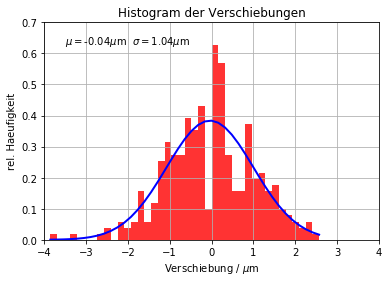

In [9]:
#Histogramm zeichnen
n, bins, patches=plt.hist(np.append(dx,dy), 40, density=1, facecolor='red', alpha=0.8) 
plt.text(-3.5, .63, '$\mu=$'+str(round(np.mean(np.append(dx,dy)),2))+'$\mu$m'+'  $\sigma=$'+str(round(np.std(np.append(dx,dy)),2))+'$\mu$m')
plt.xlabel('Verschiebung / $\mu$m')
plt.ylabel('rel. Haeufigkeit')
plt.title('Histogram der Verschiebungen')
plt.grid(True)
plt.axis([-4, 4, 0, 0.7])

#Gausskurve mit einzeichnen
gauss = norm.pdf( bins, np.mean(np.append(dx,dy)), np.std(np.append(dx,dy)))
plt.plot(bins, gauss, 'b-', linewidth=2)

#plt.savefig('figures/brown2.pdf', format='PDF')

Text(0.5, 1.0, 'Kumulative Verschiebung')

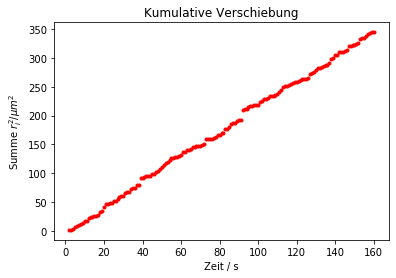

In [10]:
#Kummulative Verschiebung
r_kum=np.cumsum(r_squared)
plt.plot(t[:-1], r_kum, marker='.', color='red', linewidth=0) #t[:-1]-> gesamtes array bis auf das letzte Element
plt.xlabel('Zeit / s')
plt.ylabel('Summe $r_i^2 /\mu m^2$')
plt.title('Kumulative Verschiebung')
#plt.savefig('figures/brown3.pdf', format='PDF')